In [1]:
#Neural network training with syntethic in vivo dopamine and serotonin signals. 
import tensorflow as tf
import os
import pandas as pd
from tensorflow.keras import datasets, layers, models, utils, regularizers
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import train_test_split
print(tf.__version__)
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Activation, Dense, LeakyReLU
from sklearn.model_selection import KFold
import keras_tuner as kt

2.7.0


In [2]:
#Load colorplot datasets. 
X = np.load('reduced_data.npz')['a'].reshape(500, 200, 100, 1)

#Creating the labels. 
y = pd.read_excel('Labels_v1.xlsx', header = None, sheet_name='Reduced').values

#Shuffling the dataset.
shuffler = np.random.permutation(len(y))
X = X[shuffler]
y = y[shuffler]


ValueError: cannot reshape array of size 20000000 into shape (500,200,100,1)

In [3]:
#Define a function to plot the loss per epoch 
def plot_loss(history):
    plt.figure()
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.figure()
    plt.plot(history.history['accuracy'], label="acc")
    plt.plot(history.history['val_accuracy'], label="val.acc")
    plt.xlabel('Epoch')
    plt.ylabel('Acc.')
    
    #Define the model again with the optimal params.
    
def build_and_compile_model(): 
    model = models.Sequential()
    model.add(layers.LayerNormalization(axis = [1, 2, 3], input_shape=(200, 100, 1)))
    model.add(layers.Conv2D(10, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(layers.MaxPooling2D((3, 3)))
    model.add(layers.Conv2D(10, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(layers.MaxPooling2D((3, 3)))
    #model.add(layers.Conv2D(10, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
    #model.add(layers.Conv2D(10, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
    #model.add(layers.Conv2D(10, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
    #model.add(layers.Conv2D(10, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1000, activation='relu'))
    #model.add(layers.Dropout(0.2))
    model.add(layers.Dense(100, activation='relu'))
    #model.add(layers.Dropout(0.2))
    model.add(layers.Dense(100, activation='relu'))
    #model.add(layers.Dropout(0.2))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(1))
    model.summary()
    model.compile(loss=[tf.keras.losses.BinaryCrossentropy(from_logits=True)], optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])
    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization (LayerNo (None, 200, 100, 1)       40000     
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 98, 10)       100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 32, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 30, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 10, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2100)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              2

<Figure size 432x288 with 0 Axes>

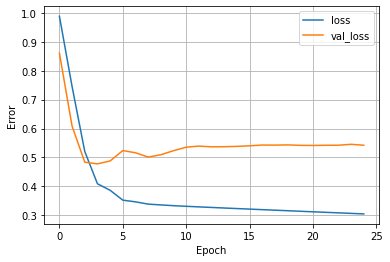

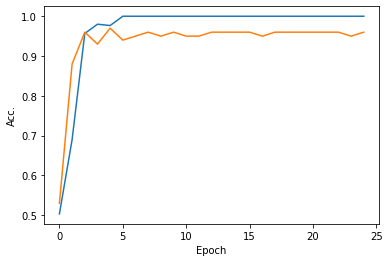

<Figure size 432x288 with 0 Axes>

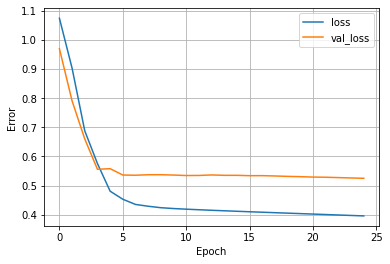

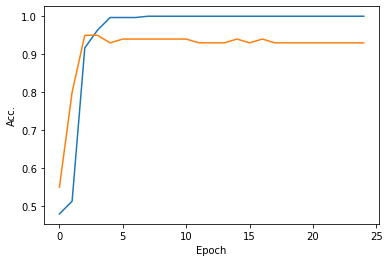

<Figure size 432x288 with 0 Axes>

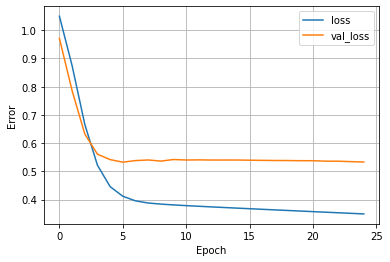

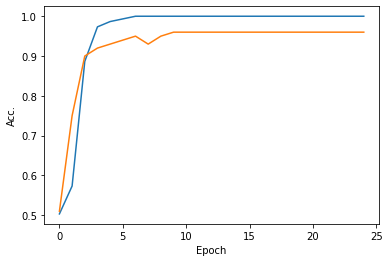

<Figure size 432x288 with 0 Axes>

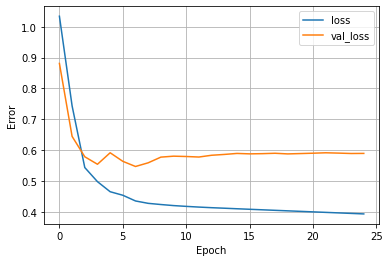

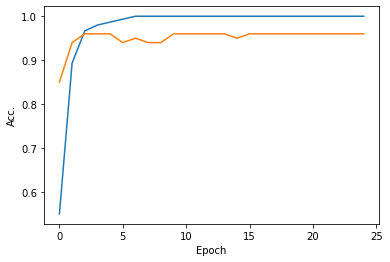

<Figure size 432x288 with 0 Axes>

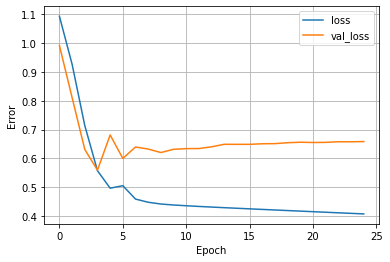

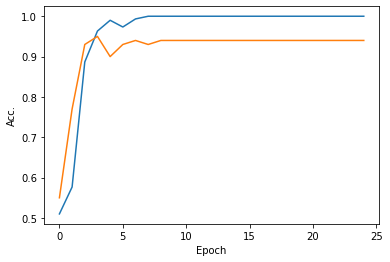

In [4]:
inputs = X
targets = y

# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    cnn = build_and_compile_model()
    #Train the model
    history = cnn.fit(
    inputs[train], targets[train],                         # changed expression for test features and labels
    validation_split=0.25,                                 # I removed validation for k-fold cross validation
    verbose=1, epochs=25)
    newfig = plt.figure()
    plot_loss(history)
    #Prediction of the validation dataset 
    test_predictions = cnn.predict(inputs[test]).flatten()
    fold_no = fold_no + 1